## Calcul de la connexion affine et du tenseur de courbure à partir de la métrique

La connexion affine s'exprime ainsi en fonction du tenseur métrique:

$$
\Gamma^i_{jk} =  g^{il} \Gamma_{ljk} \qquad \Gamma_{ljk} = \frac12 \left(\partial_j g_{lk} +  \partial_k g_{jl} - \partial_l g_{jk}\right)
$$

In [1]:
from sympy import *
from sympy import Array

init_printing()

t, r, θ, ϕ = symbols('t, r, θ, ϕ')
A = Function('A')
B = Function('B')
gd = Array([
    [A(r), 0, 0, 0],
    [0, -B(r), 0, 0], 
    [0, 0, -r**2, 0],
    [0, 0, 0, -r**2*sin(θ)**2]
])
coords = Array([t, r,θ, ϕ])
gu = Array([
    [1/A(r), 0, 0, 0],
    [0, -1/B(r), 0, 0], 
    [0, 0, -1/r**2, 0],
    [0, 0, 0, -1/(r**2*sin(θ)**2)]
])
gd, gu

⎛                                 ⎡ 1                         ⎤⎞
⎜                                 ⎢────   0     0       0     ⎥⎟
⎜                                 ⎢A(r)                       ⎥⎟
⎜                                 ⎢                           ⎥⎟
⎜⎡A(r)    0     0        0     ⎤  ⎢      -1                   ⎥⎟
⎜⎢                             ⎥  ⎢ 0    ────   0       0     ⎥⎟
⎜⎢ 0    -B(r)   0        0     ⎥  ⎢      B(r)                 ⎥⎟
⎜⎢                             ⎥  ⎢                           ⎥⎟
⎜⎢               2             ⎥, ⎢            -1             ⎥⎟
⎜⎢ 0      0    -r        0     ⎥  ⎢ 0     0    ───      0     ⎥⎟
⎜⎢                             ⎥  ⎢              2            ⎥⎟
⎜⎢                    2    2   ⎥  ⎢             r             ⎥⎟
⎜⎣ 0      0     0   -r ⋅sin (θ)⎦  ⎢                           ⎥⎟
⎜                                 ⎢                    -1     ⎥⎟
⎜                                 ⎢ 0     0     0   ──────────⎥⎟
⎜                        

In [2]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
gammad = factor(gammad)
gammad

⎡                            ⎡ d                                  ⎤           
⎢⎡          d             ⎤  ⎢-──(A(r))                           ⎥           
⎢⎢          ──(A(r))      ⎥  ⎢ dr                                 ⎥           
⎢⎢          dr            ⎥  ⎢──────────      0       0      0    ⎥           
⎢⎢   0      ────────  0  0⎥  ⎢    2                               ⎥  ⎡0  0   0
⎢⎢             2          ⎥  ⎢                                    ⎥  ⎢        
⎢⎢                        ⎥  ⎢             d                      ⎥  ⎢0  0   -
⎢⎢d                       ⎥  ⎢            -──(B(r))               ⎥  ⎢        
⎢⎢──(A(r))                ⎥  ⎢             dr                     ⎥  ⎢0  -r  0
⎢⎢dr                      ⎥  ⎢    0       ──────────  0      0    ⎥  ⎢        
⎢⎢────────     0      0  0⎥  ⎢                2                   ⎥  ⎢        
⎢⎢   2                    ⎥  ⎢                                    ⎥  ⎣0  0   0
⎢⎢                        ⎥  ⎢    0           0     

In [3]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
Γ = simplify(Γ)
Γ

⎡                            ⎡d                                    ⎤          
⎢                            ⎢──(A(r))                             ⎥          
⎢                            ⎢dr                                   ⎥          
⎢⎡          d             ⎤  ⎢────────     0       0         0     ⎥          
⎢⎢          ──(A(r))      ⎥  ⎢ 2⋅B(r)                              ⎥  ⎡0  0  0
⎢⎢          dr            ⎥  ⎢                                     ⎥  ⎢       
⎢⎢   0      ────────  0  0⎥  ⎢          d                          ⎥  ⎢      1
⎢⎢           2⋅A(r)       ⎥  ⎢          ──(B(r))                   ⎥  ⎢0  0  ─
⎢⎢                        ⎥  ⎢          dr                         ⎥  ⎢      r
⎢⎢d                       ⎥  ⎢   0      ────────   0         0     ⎥  ⎢       
⎢⎢──(A(r))                ⎥  ⎢           2⋅B(r)                    ⎥  ⎢   1   
⎢⎢dr                      ⎥  ⎢                                     ⎥  ⎢0  ─  0
⎢⎢────────     0      0  0⎥  ⎢                    -r

## Calcul du tenseur de Riemann

En fonction de la connexion affine, le tenseur de Riemann s'exprime ainsi:

$$
R^l{}_{kji} = 
    \partial_j\Gamma^l{}_{ki} - \partial_i\Gamma^l{}_{kj}  + \Gamma^m{}_{ki}\Gamma^l{}_{mj} - \Gamma^m{}_{kj}\Gamma^l{}_{mi}
$$

Le tenseur de Ricci est une contraction du tenseur de Riemann: $R_{ki} = R^j{}_{kji}$.

La courbure scalaire est la contraction du tenseur de Ricci : $R = g^{ki}R_{ki}$.



In [4]:
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0)) + permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                           ⎡0  0  0  0⎤                      
⎢                                           ⎢          ⎥                      
⎢                                           ⎢0  0  0  0⎥                      
⎢                                           ⎢          ⎥                      
⎢                                           ⎢0  0  0  0⎥                      
⎢                                           ⎢       

In [5]:
# tenseur de Riemann covariant
Rcov =  tensorcontraction(tensorproduct(gd, R), (1,2))
Rcov = simplify(Rcov)
Rcov

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                           ⎡0  0  0  0⎤                      
⎢                                           ⎢          ⎥                      
⎢                                           ⎢0  0  0  0⎥                      
⎢                                           ⎢          ⎥                      
⎢                                           ⎢0  0  0  0⎥                      
⎢                                           ⎢          ⎥                      
⎢                                           ⎣0  0  0

In [6]:
# vérification des propriétés de symétrie de Rcov
A = Rcov + permutedims(Rcov,(0,2,3,1)) + permutedims(Rcov,(0,3,1,2))
trigsimp(A)

⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤                   ⎡0  0  0  0⎤                    
⎢⎢          ⎥  ⎢          ⎥                   ⎢          ⎥                    
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥                   ⎢0  0  0  0⎥                    
⎢⎢          ⎥  ⎢          ⎥                   ⎢          ⎥                    
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥                   ⎢0  0  0  0⎥                    
⎢⎢          ⎥  ⎢          ⎥                   ⎢          ⎥                    
⎢⎣0  0  0  0⎦  ⎣0  0  0  0⎦                   ⎣0  0  0  0⎦                    
⎢                                                                             
⎢                                                                             
⎢                            ⎡0  0  0                   0                  ⎤  
⎢⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎢                                             ⎥  
⎢⎢          ⎥  ⎢          ⎥  ⎢0  0  0                   0                  ⎥  
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢                      

In [7]:
# vérification de la nullité de la contraction des deux premiers indices
tensorcontraction(R, (0,1))

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [8]:
# tenseur de Ricci
Ricci = tensorcontraction(R, (0,2))
Ricci = simplify(Ricci)
Ricci

⎡  2                                                                          
⎢ d                                        2                                  
⎢───(A(r))   d        d          ⎛d       ⎞    d                              
⎢  2         ──(A(r))⋅──(B(r))   ⎜──(A(r))⎟    ──(A(r))                       
⎢dr          dr       dr         ⎝dr      ⎠    dr                             
⎢───────── - ───────────────── - ─────────── + ────────                       
⎢  2⋅B(r)            2           4⋅A(r)⋅B(r)    r⋅B(r)                        
⎢                 4⋅B (r)                                                     
⎢                                                                             
⎢                                                            2                
⎢                                                           d                 
⎢                                                          ───(A(r))   d      
⎢                                                   

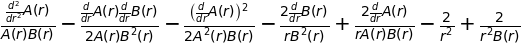

In [9]:
# Courbure scalaire
Rm = tensorcontraction(tensorproduct(gu,Ricci), (1,2))
Rscal = tensorcontraction(Rm, (0,1))
simplify(Rscal)

In [10]:
#dérivée covariante
def dcov(A, coords, pos):
    rank = len(pos)
    D1 = derive_by_array(A, coords)
    for i in range(rank):
        perm = list(range(rank+1))
        perm[i+1] = 0
        perm[0] = 1
        for j in range(1, i+1):
            perm[j] += 1
        if pos[i] is 0:
            print('indice ', i, ' est covariant, perm = ', tuple(perm))
            B = tensorcontraction(tensorproduct(Γ, A), (0, i+3))
            D1 -= permutedims(B, perm)
        else:
            print('indice ', i, ' est contravariant, perm = ', tuple(perm))
            B = tensorcontraction(tensorproduct(Γ, A), (1, i+3))
            D1 += permutedims(B, perm)
    return D1

In [11]:
# Affichage de dcov
simplify(dcov(gd, coords, (0,0)))

indice  0  est covariant, perm =  (1, 0, 2)
indice  1  est covariant, perm =  (1, 2, 0)


⎡⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤  ⎡0  0  0  0⎤⎤
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎢⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥  ⎢0  0  0  0⎥⎥
⎢⎢          ⎥  ⎢          ⎥  ⎢          ⎥  ⎢          ⎥⎥
⎣⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦  ⎣0  0  0  0⎦⎦

In [13]:
# identité de Bianchi
B = dcov(Rcov, coords, (0,0,0,0))
permutedims(B, (1,2,3,4,0))+permutedims(B, (1,2,0,3,4))+permutedims(B, (1,2,4,0,3))

indice  0  est covariant, perm =  (1, 0, 2, 3, 4)
indice  1  est covariant, perm =  (1, 2, 0, 3, 4)
indice  2  est covariant, perm =  (1, 2, 3, 0, 4)
indice  3  est covariant, perm =  (1, 2, 3, 4, 0)


⎡⎡                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                                            
⎢⎢                                                  

## Solution de Schwarzchild

In [14]:
from sympy import *
from sympy import Array

init_printing()

t, r, θ, ϕ = symbols('t, r, θ, ϕ')
k = symbols('k')
gd = Array([
    [(1-k/r), 0, 0, 0],
    [0, -1/(1-k/r), 0, 0], 
    [0, 0, -r**2, 0],
    [0, 0, 0, -r**2*sin(θ)**2]
])
coords = Array([t, r,θ, ϕ])
gu = Array([
    [1/(1-k/r), 0, 0, 0],
    [0, -(1-k/r), 0, 0], 
    [0, 0, -1/r**2, 0],
    [0, 0, 0, -1/(r**2*sin(θ)**2)]
])
gd

⎡  k                               ⎤
⎢- ─ + 1     0      0        0     ⎥
⎢  r                               ⎥
⎢                                  ⎥
⎢           -1                     ⎥
⎢   0     ───────   0        0     ⎥
⎢           k                      ⎥
⎢         - ─ + 1                  ⎥
⎢           r                      ⎥
⎢                                  ⎥
⎢                    2             ⎥
⎢   0        0     -r        0     ⎥
⎢                                  ⎥
⎢                         2    2   ⎥
⎣   0        0      0   -r ⋅sin (θ)⎦

In [15]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
gammad = factor(gammad)
gammad

⎡                    ⎡-k                             ⎤                        
⎢⎡       k        ⎤  ⎢────       0       0      0    ⎥                        
⎢⎢ 0    ────  0  0⎥  ⎢   2                           ⎥                        
⎢⎢         2      ⎥  ⎢2⋅r                            ⎥  ⎡0  0   0          0  
⎢⎢      2⋅r       ⎥  ⎢                               ⎥  ⎢                     
⎢⎢                ⎥  ⎢           k                   ⎥  ⎢0  0   -r         0  
⎢⎢ k              ⎥  ⎢ 0    ───────────  0      0    ⎥  ⎢                     
⎢⎢────   0    0  0⎥  ⎢                2              ⎥  ⎢0  -r  0          0  
⎢⎢   2            ⎥  ⎢      2⋅(-k + r)               ⎥  ⎢                     
⎢⎢2⋅r             ⎥  ⎢                               ⎥  ⎢            2        
⎢⎢                ⎥  ⎢ 0         0       r      0    ⎥  ⎣0  0   0   r ⋅sin(θ)⋅
⎢⎢ 0     0    0  0⎥  ⎢                               ⎥                        
⎢⎢                ⎥  ⎢                           2  

In [13]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
Γ = simplify(Γ)
Γ

⎡                                    ⎡k⋅(-k + r)                              
⎢⎡                   k            ⎤  ⎢──────────       0         0           0
⎢⎢     0        ────────────  0  0⎥  ⎢      3                                 
⎢⎢              2⋅r⋅(-k + r)      ⎥  ⎢   2⋅r                                  
⎢⎢                                ⎥  ⎢                                        
⎢⎢     k                          ⎥  ⎢                 k                      
⎢⎢────────────       0        0  0⎥  ⎢    0       ───────────    0           0
⎢⎢2⋅r⋅(-k + r)                    ⎥  ⎢            2⋅r⋅(k - r)                 
⎢⎢                                ⎥  ⎢                                        
⎢⎢     0             0        0  0⎥  ⎢    0            0       k - r         0
⎢⎢                                ⎥  ⎢                                        
⎢⎣     0             0        0  0⎦  ⎢                                        
⎣                                    ⎣    0         

In [15]:
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0))+ permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

⎡                                 ⎡                 k           ⎤             
⎢                                 ⎢    0       ───────────  0  0⎥    ⎡        
⎢                                 ⎢             2               ⎥    ⎢ 0   0  
⎢        ⎡0  0  0  0⎤             ⎢            r ⋅(-k + r)      ⎥    ⎢        
⎢        ⎢          ⎥             ⎢                             ⎥    ⎢        
⎢        ⎢0  0  0  0⎥             ⎢    k                        ⎥    ⎢ 0   0  
⎢        ⎢          ⎥             ⎢──────────       0       0  0⎥    ⎢        
⎢        ⎢0  0  0  0⎥             ⎢ 2                           ⎥    ⎢ k      
⎢        ⎢          ⎥             ⎢r ⋅(k - r)                   ⎥    ⎢───  0  
⎢        ⎣0  0  0  0⎦             ⎢                             ⎥    ⎢2⋅r     
⎢                                 ⎢    0            0       0  0⎥    ⎢        
⎢                                 ⎢                             ⎥    ⎣ 0   0  
⎢                                 ⎣    0            

In [16]:
# tenseur de Ricci
Ricci = tensorcontraction(R, (0,2))
Ricci = simplify(Ricci)
Ricci

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

## Carré de la courbure

In [17]:
Rcov =  tensorcontraction(tensorproduct(gd, R), (1,2))
Rcov = simplify(Rcov)
Rcov

⎡                                                                             
⎢                                                      ⎡     k       ⎤        
⎢                                                      ⎢ 0   ──  0  0⎥        
⎢                                                      ⎢      3      ⎥        
⎢                ⎡0  0  0  0⎤                          ⎢     r       ⎥        
⎢                ⎢          ⎥                          ⎢             ⎥        
⎢                ⎢0  0  0  0⎥                          ⎢-k           ⎥        
⎢                ⎢          ⎥                          ⎢───  0   0  0⎥        
⎢                ⎢0  0  0  0⎥                          ⎢  3          ⎥        
⎢                ⎢          ⎥                          ⎢ r           ⎥        
⎢                ⎣0  0  0  0⎦                          ⎢             ⎥        
⎢                                                      ⎢ 0   0   0  0⎥        
⎢                                                   

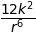

In [18]:
Rcontra = tensorcontraction(tensorproduct(gu, R), (1,3))
Rcontra = tensorcontraction(tensorproduct(gu, Rcontra), (1,4))
Rcontra = tensorcontraction(tensorproduct(gu, Rcontra), (1,5))
R2 = tensorcontraction(tensorproduct(Rcov, Rcontra), (0,4))
R2 = tensorcontraction(R2, (0,3))
R2 = tensorcontraction(R2, (0,2))
R2 = tensorcontraction(R2, (0,1))
R2 = simplify(R2)
R2